Title: Popular Classification Algorithms

Logistic Regression


Task 1: Predict the likelihood of a student passing a test based on study hours.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Simulate a dataset of study hours and pass/fail status
np.random.seed(42)
study_hours = np.random.uniform(1, 10, 100)
# Probability of passing increases with study hours
probability_of_pass = 1 / (1 + np.exp(-(study_hours - 3)))
passed = np.random.binomial(1, probability_of_pass)

data = pd.DataFrame({'study_hours': study_hours, 'passed': passed})

print("Simulated student study hours and test outcome data:")
print(data.head())

# Separate features (X) and target (y)
X = data[['study_hours']]
y = data['passed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train a Logistic Regression model (suitable for binary classification)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict the likelihood of passing for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (passed=1)
y_pred_binary = model.predict(X_test)             # Binary prediction (0 or 1) based on default threshold of 0.5

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary, target_names=['Fail', 'Pass'])

print("\nLikelihood of Passing Prediction based on Study Hours:")
print(f"Accuracy on the test set: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# You can now use the trained model to predict the likelihood of passing for new study hours
new_study_hours = pd.DataFrame({'study_hours': [2, 5, 8]})
likelihood = model.predict_proba(new_study_hours)[:, 1]
binary_prediction = model.predict(new_study_hours)

print("\nPredictions for new study hours:")
for hours, prob, prediction in zip(new_study_hours['study_hours'], likelihood, binary_prediction):
    print(f"Study Hours: {hours:.2f}, Likelihood of Passing: {prob:.2%}, Predicted Outcome: {'Pass' if prediction == 1 else 'Fail'}")

Simulated student study hours and test outcome data:
   study_hours  passed
0     4.370861       1
1     9.556429       1
2     7.587945       1
3     6.387926       1
4     2.404168       1

Likelihood of Passing Prediction based on Study Hours:
Accuracy on the test set: 0.9000

Classification Report:
              precision    recall  f1-score   support

        Fail       0.71      1.00      0.83         5
        Pass       1.00      0.87      0.93        15

    accuracy                           0.90        20
   macro avg       0.86      0.93      0.88        20
weighted avg       0.93      0.90      0.90        20


Predictions for new study hours:
Study Hours: 2.00, Likelihood of Passing: 34.80%, Predicted Outcome: Fail
Study Hours: 5.00, Likelihood of Passing: 80.86%, Predicted Outcome: Pass
Study Hours: 8.00, Likelihood of Passing: 97.10%, Predicted Outcome: Pass


Task 2: Predict customer churn based on service usage data.

Simulated customer service usage data with churn outcome:
   monthly_usage_gb  call_center_interactions  account_age_months  churn
0         43.708611                         3                  33      1
1         95.564288                         2                  10      1
2         75.879455                         0                  29      1
3         63.879264                         3                  13      1
4         24.041678                         3                  12      0

Customer Churn Prediction based on Service Usage Data:
Accuracy on the test set: 0.8500

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.00      0.00      0.00         9
       Churn       0.85      1.00      0.92        51

    accuracy                           0.85        60
   macro avg       0.42      0.50      0.46        60
weighted avg       0.72      0.85      0.78        60


Confusion Matrix:
[[ 0  9]
 [ 0 51]]


/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


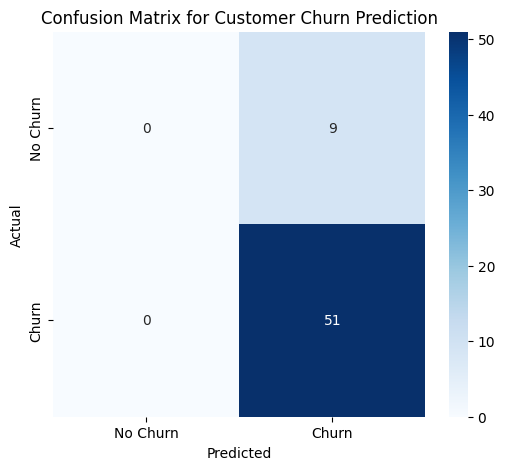


Predictions for new customer data:
Usage: 30.00 GB, Interactions: 1, Age: 12 months, Predicted Churn: Yes, Probability: 72.81%
Usage: 80.00 GB, Interactions: 0, Age: 24 months, Predicted Churn: Yes, Probability: 94.48%
Usage: 20.00 GB, Interactions: 3, Age: 6 months, Predicted Churn: Yes, Probability: 76.52%


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate customer service usage data with a churn outcome
np.random.seed(42)
n_customers = 200
monthly_usage_gb = np.random.uniform(10, 100, n_customers)
call_center_interactions = np.random.randint(0, 5, n_customers)
account_age_months = np.random.randint(1, 36, n_customers)

# Simulate churn based on usage, interactions, and age
# Customers with very high usage, frequent interactions, or short tenure are more likely to churn
churn_probability = 1 / (1 + np.exp(-(0.05 * monthly_usage_gb + 0.3 * call_center_interactions - 0.02 * account_age_months - 1)))
churn = np.random.binomial(1, churn_probability)

data = pd.DataFrame({
    'monthly_usage_gb': monthly_usage_gb,
    'call_center_interactions': call_center_interactions,
    'account_age_months': account_age_months,
    'churn': churn  # 1 for churn, 0 for no churn
})

print("Simulated customer service usage data with churn outcome:")
print(data.head())

# Separate features (X) and target (y)
X = data[['monthly_usage_gb', 'call_center_interactions', 'account_age_months']]
y = data['churn']

# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train a Logistic Regression model (suitable for binary classification)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict customer churn on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
confusion = confusion_matrix(y_test, y_pred)

print("\nCustomer Churn Prediction based on Service Usage Data:")
print(f"Accuracy on the test set: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(confusion)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Customer Churn Prediction')
plt.show()

# You can now use the trained model to predict churn for new customer data
new_customer_data = pd.DataFrame({
    'monthly_usage_gb': [30, 80, 20],
    'call_center_interactions': [1, 0, 3],
    'account_age_months': [12, 24, 6]
})

# Scale the new data using the same scaler fitted on the training data
new_customer_data_scaled = scaler.transform(new_customer_data)
churn_prediction = model.predict(new_customer_data_scaled)
churn_probability = model.predict_proba(new_customer_data_scaled)[:, 1]

print("\nPredictions for new customer data:")
for i in range(len(new_customer_data)):
    print(f"Usage: {new_customer_data['monthly_usage_gb'][i]:.2f} GB, Interactions: {new_customer_data['call_center_interactions'][i]}, Age: {new_customer_data['account_age_months'][i]} months, Predicted Churn: {'Yes' if churn_prediction[i] == 1 else 'No'}, Probability: {churn_probability[i]:.2%}")

Task 3: Classify if a review is positive or negative using NLP.

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/vscode/nltk_data...


Simulated movie review dataset:
                                              review  sentiment
0  This movie was absolutely fantastic! The actin...          1
1  I really enjoyed this film. It had a great plo...          1
2  Not a bad movie, but it wasn't particularly me...          0
3  This was quite disappointing. The plot was wea...          0
4  Absolutely terrible! I wasted my time watching...          0

Processed reviews:
                                              review  \
0  This movie was absolutely fantastic! The actin...   
1  I really enjoyed this film. It had a great plo...   
2  Not a bad movie, but it wasn't particularly me...   
3  This was quite disappointing. The plot was wea...   
4  Absolutely terrible! I wasted my time watching...   

                                    processed_review  
0  movie absolutely fantastic acting superb story...  
1  really enjoyed film great plot wonderful chara...  
2      bad movie wasnt particularly memorable either  
3  quit

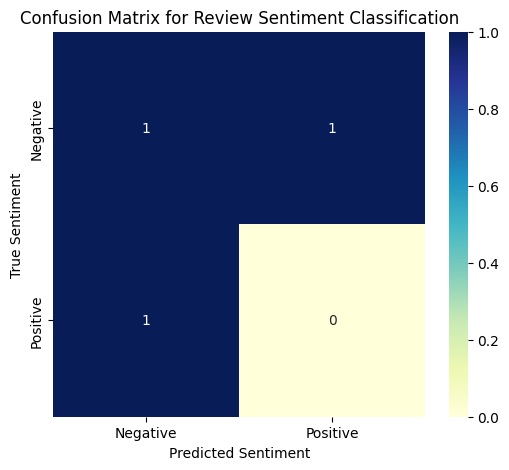


Predictions for new reviews:
Review: "This is an amazing product, I highly recommend it." - Predicted Sentiment: Negative
Review: "The service was terrible and I was very disappointed." - Predicted Sentiment: Negative
Review: "It was an okay experience, nothing too exciting." - Predicted Sentiment: Negative


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources (run this once)
try:
    stopwords.words('english')
    WordNetLemmatizer().lemmatize('running')
except LookupError:
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')

# Simulate a dataset of movie reviews and sentiment
reviews = [
    "This movie was absolutely fantastic! The acting was superb and the story captivating.",
    "I really enjoyed this film. It had a great plot and wonderful characters.",
    "Not a bad movie, but it wasn't particularly memorable either.",
    "This was quite disappointing. The plot was weak and the acting unconvincing.",
    "Absolutely terrible! I wasted my time watching this.",
    "A decent film, I've seen better but it was okay.",
    "The best movie I've seen all year!",
    "Utterly boring and predictable. Avoid at all costs.",
    "A fun and engaging movie that kept me entertained.",
    "Mediocre at best. Nothing special about this one."
]
sentiment = [1, 1, 0, 0, 0, 0, 1, 0, 1, 0]  # 1 for positive, 0 for negative

df = pd.DataFrame({'review': reviews, 'sentiment': sentiment})

print("Simulated movie review dataset:")
print(df.head())

# Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A) # Remove non-alphabetic characters
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['processed_review'] = df['review'].apply(preprocess_text)

print("\nProcessed reviews:")
print(df[['review', 'processed_review']].head())

# Separate features (X) and target (y)
X = df['processed_review']
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\nTF-IDF transformed training data shape:", X_train_tfidf.shape)
print("TF-IDF transformed testing data shape:", X_test_tfidf.shape)

# Initialize and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict sentiment on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
confusion = confusion_matrix(y_test, y_pred)

print("\nSentiment Classification of Reviews:")
print(f"Accuracy on the test set: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(confusion)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Confusion Matrix for Review Sentiment Classification')
plt.show()

# Example of predicting sentiment for new reviews
new_reviews = [
    "This is an amazing product, I highly recommend it.",
    "The service was terrible and I was very disappointed.",
    "It was an okay experience, nothing too exciting."
]
processed_new_reviews = [preprocess_text(review) for review in new_reviews]
new_reviews_tfidf = tfidf_vectorizer.transform(processed_new_reviews)
new_predictions = model.predict(new_reviews_tfidf)

print("\nPredictions for new reviews:")
for review, prediction in zip(new_reviews, new_predictions):
    sentiment_label = 'Positive' if prediction == 1 else 'Negative'
    print(f"Review: \"{review}\" - Predicted Sentiment: {sentiment_label}")